# Import Libraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima


# Import Data

In [18]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"

ts = pd.read_csv(url)

ts.to_csv("/workspaces/alfonsoMG_TimeSeries/data/raw/sales.csv")

ts.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [19]:
# Convertir la columna 'date' a datetime
ts['date'] = pd.to_datetime(ts['date'])

# Formatear la columna 'date' al formato AAAA-DD_MM
# ts['date'] = ts['date'].dt.strftime('%Y-%d-%m')

ts = ts.set_index("date")
ts.head()

,sales
date,
2022-09-03 17:10:08.079328,55.292157
2022-09-04 17:10:08.079328,53.803211
2022-09-05 17:10:08.079328,58.141693
2022-09-06 17:10:08.079328,64.530899
2022-09-07 17:10:08.079328,66.013633


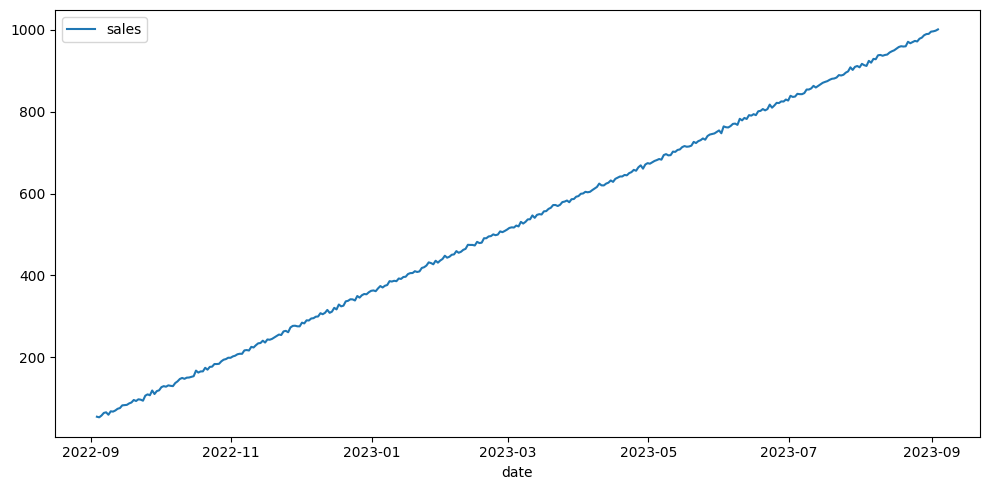

In [20]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data=ts)
# Crear el lineplot con Seaborn

plt.tight_layout()

plt.show()

In [21]:
decomposition = seasonal_decompose(ts, period = 7)
decomposition

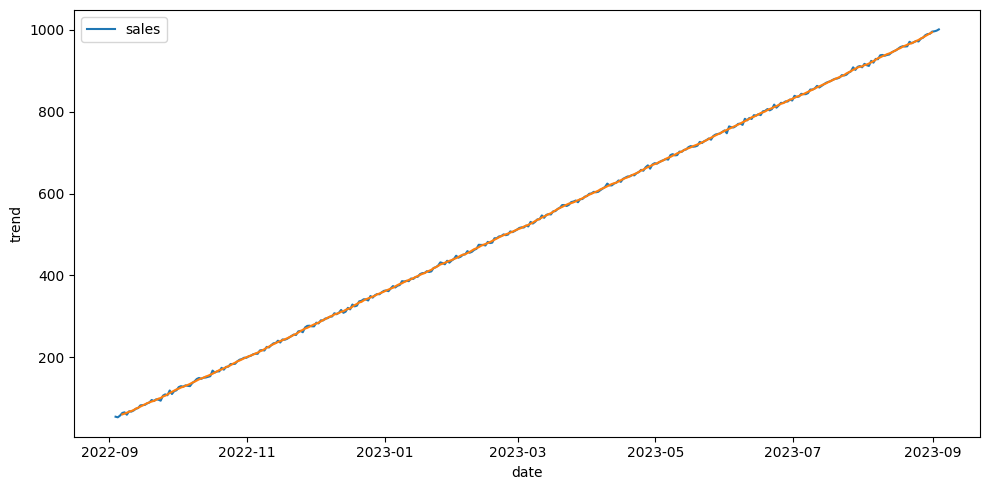

In [22]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

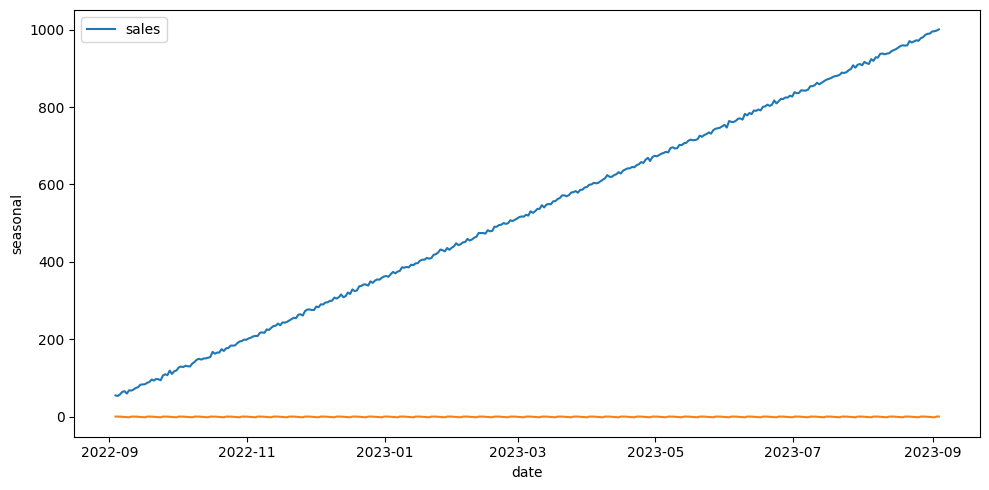

In [23]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [24]:
def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

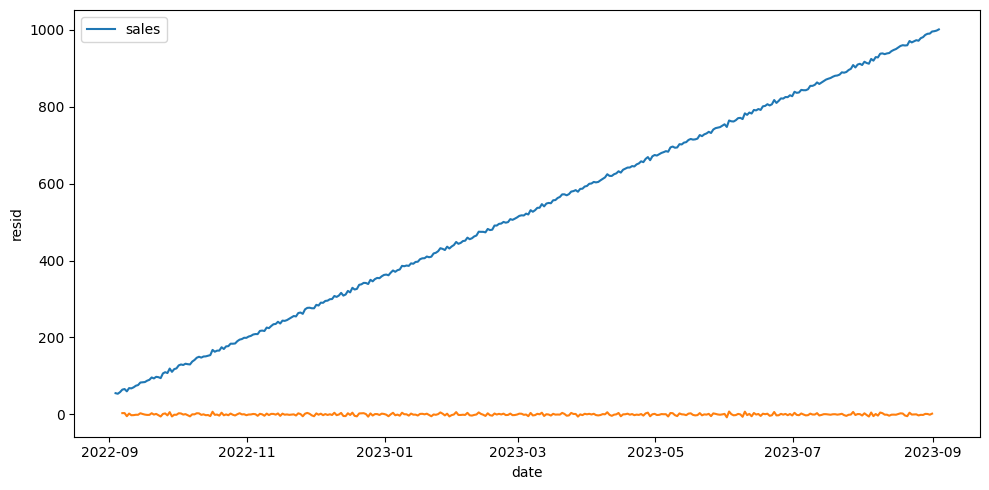

In [25]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

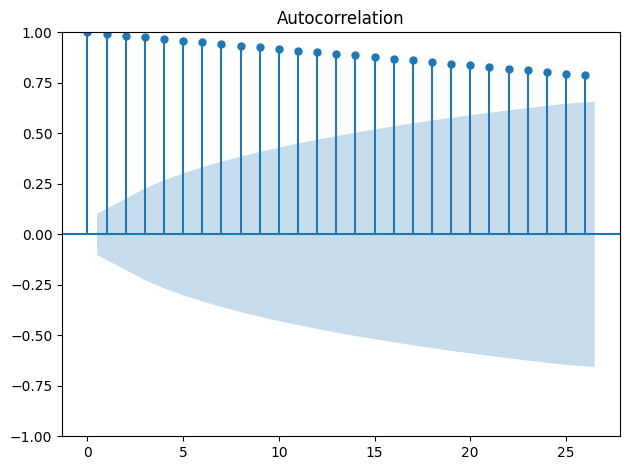

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

In [27]:
ts_stationary = ts.diff().dropna()

test_stationarity(ts_stationary)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -9.430263e+00
p-value                        5.212954e-16
#Lags Used                     1.200000e+01
Number of Observations Used    3.520000e+02
Critical Value (1%)           -3.449065e+00
Critical Value (5%)           -2.869786e+00
Critical Value (10%)          -2.571163e+00
dtype: float64

In [28]:
model = auto_arima(ts_stationary, seasonal = True, trace = True, m = 7)

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=2.16 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=2096.542, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=1966.396, Time=0.13 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=2209.657, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=1970.972, Time=0.04 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=1968.120, Time=0.38 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=1968.220, Time=0.20 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=1966.919, Time=0.08 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=1965.376, Time=0.82 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=1965.211, Time=1.26 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=1963.937, Time=0.83 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=1967.822, Time=0.32 sec
 ARIMA(0,0,0)(1,0,2)[7] intercept   : AIC=2094.918, Time=0.85 sec
 ARIMA(2,0,0)(1,0,2)[7] intercept   : AIC=1911.553, Time=0.88 sec
 ARIMA(2,0,0)(0,0,2)

In [29]:
forecast = model.predict(20)
forecast

2023-09-04 17:10:08.079328    2.097971
2023-09-05 17:10:08.079328    2.615429
2023-09-06 17:10:08.079328    2.284769
2023-09-07 17:10:08.079328    2.940115
2023-09-08 17:10:08.079328    2.340791
2023-09-09 17:10:08.079328    2.437700
2023-09-10 17:10:08.079328    2.673627
2023-09-11 17:10:08.079328    2.525567
2023-09-12 17:10:08.079328    2.601195
2023-09-13 17:10:08.079328    2.552504
2023-09-14 17:10:08.079328    2.649867
2023-09-15 17:10:08.079328    2.561022
2023-09-16 17:10:08.079328    2.575416
2023-09-17 17:10:08.079328    2.610372
2023-09-18 17:10:08.079328    2.588439
2023-09-19 17:10:08.079328    2.599643
2023-09-20 17:10:08.079328    2.592433
2023-09-21 17:10:08.079328    2.606852
2023-09-22 17:10:08.079328    2.593694
2023-09-23 17:10:08.079328    2.595826
Freq: D, dtype: float64

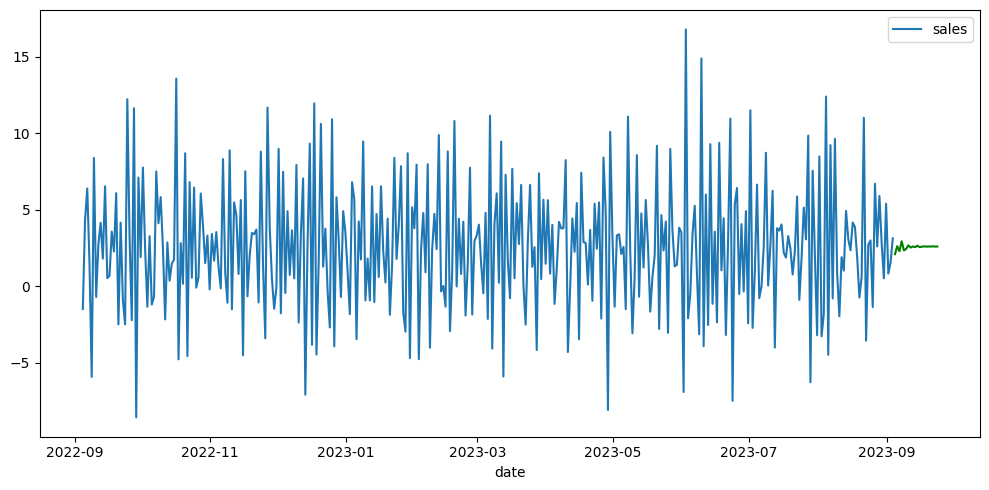

In [30]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_stationary)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()

In [37]:
total_reverted = pd.concat([ts_stationary, forecast], axis=0)
total = total_reverted.cumsum()

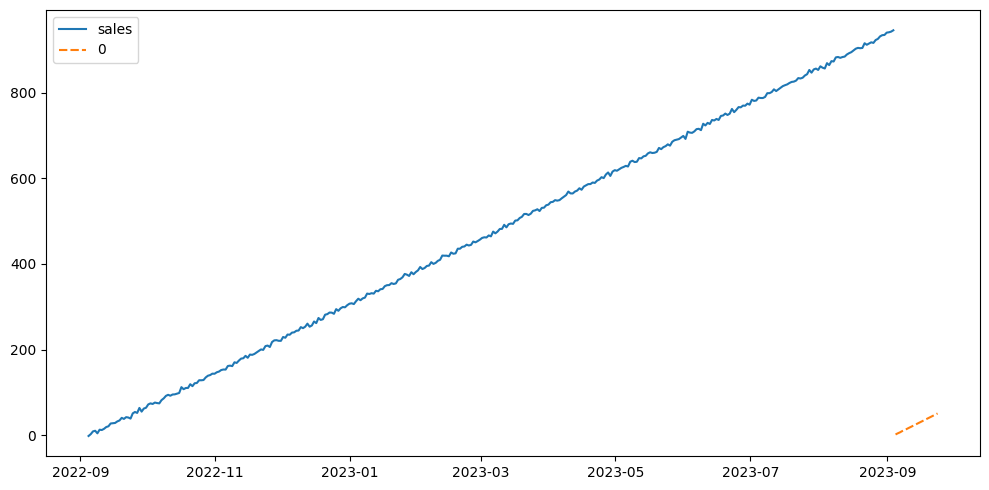

In [38]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total)

plt.tight_layout()

plt.show()